A1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from time import time



In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\SEM6\Neural Networks and Deep Learning\assgn1_dataset.csv")


In [27]:
#Data types
data.info()
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(numerical_cols)
print(categorical_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB
Index(['Class Label', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       ...
       'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198',
       'f199'],
      dtype='object', length=201)
Index(['Filename'], dtype='object')


In [28]:
#Null values
data.isnull().sum()

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

In [29]:
#Class Balance
if 'Class Label' in data.columns:  
    print("\nClass Distribution:")
    print(data['Class Label'].value_counts())



Class Distribution:
Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


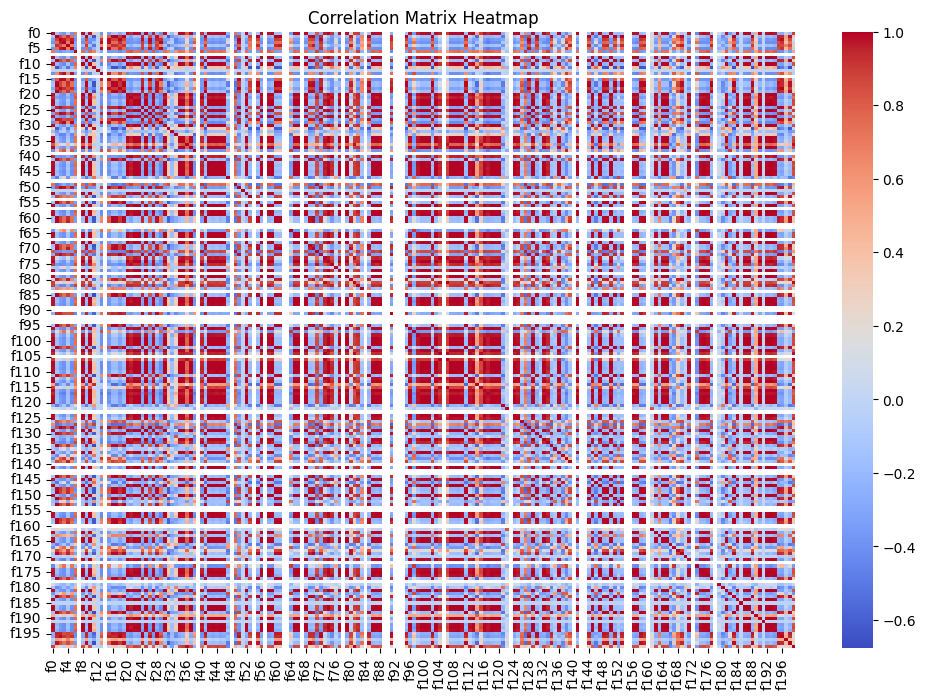

In [30]:
#Attribute Correlation
df=data.iloc[:,2:]
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Matrix Heatmap")
plt.show()



In [31]:
# Matrix rank
matrix_rank = np.linalg.matrix_rank(data.iloc[:, 2:].values)
print("\n--- Matrix Rank ---")
print(f"Rank of data matrix: {matrix_rank}")



--- Matrix Rank ---
Rank of data matrix: 174


In [32]:
# Data range and normalization
data_range = data.iloc[:, 2:].apply(lambda x: (x.min(), x.max()))
print("\n--- Data Range ---")
print(data_range)

scaler = StandardScaler()
data.iloc[:, 2:] = scaler.fit_transform(data.iloc[:, 2:])
print("\n--- Data Normalized ---")
print("The normalized data is",data)



--- Data Range ---
          f0          f1          f2          f3          f4          f5  \
0    0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
1  781.78949  459.207794  536.879639  760.753845  202.598496  587.289551   

          f6  f7           f8          f9  ...         f190      f191  \
0    0.00000   0      0.00000    0.000000  ...     0.000000  0.000000   
1  217.98201   0  10129.19336  260.783539  ...  7535.423828  0.341233   

          f192         f193         f194        f195        f196       f197  \
0     0.000000     0.000000     0.000000    0.000000    0.000000   0.000000   
1  5972.883789  6563.629883  5749.376465  750.316284  571.680176  31.048813   

         f198        f199  
0    0.000000     0.00000  
1  505.643402  1758.73584  

[2 rows x 200 columns]

--- Data Normalized ---
The normalized data is               Filename  Class Label         f0        f1        f2        f3  \
0                1.png            2   0.601397 -0.618413 

A2

In [37]:
X = data.iloc[:, 2:].values
y = data['Class Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Classifiers
classifiers = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Naïve Bayes": GaussianNB()
}

# Evaluation metrics storage
results = {}
for name, clf in classifiers.items():
    start_train = time()
    clf.fit(X_train, y_train)
    end_train = time()
    
    start_test = time()
    y_pred = clf.predict(X_test)
    end_test = time()
    
    # Metrics
    accuracy = clf.score(X_test, y_test)
    precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()
    try:
        y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
        auroc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else "NA"
    except:
        auroc = "NA"
    
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUROC: {auroc}")
    print(f"Training Time: {end_train - start_train:.4f}s, Testing Time: {end_test - start_test:.4f}s")
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUROC": auroc,
        "Training Time": end_train - start_train,
        "Testing Time": end_test - start_test
    }

# Print summary
print("\n--- Summary of Results ---")
summary = pd.DataFrame(results).T
print(summary)




--- kNN ---
Accuracy: 0.9373, Precision: 0.9393, Recall: 0.9373, F1-Score: 0.9374, AUROC: NA
Training Time: 0.0034s, Testing Time: 0.0156s

--- Decision Tree ---
Accuracy: 0.9177, Precision: 0.9186, Recall: 0.9177, F1-Score: 0.9178, AUROC: NA
Training Time: 0.5980s, Testing Time: 0.0000s

--- SVM ---
Accuracy: 0.9300, Precision: 0.9332, Recall: 0.9300, F1-Score: 0.9301, AUROC: NA
Training Time: 0.7970s, Testing Time: 0.0473s

--- Random Forest ---
Accuracy: 0.9361, Precision: 0.9383, Recall: 0.9361, F1-Score: 0.9362, AUROC: NA
Training Time: 3.0081s, Testing Time: 0.0161s

--- Naïve Bayes ---
Accuracy: 0.9238, Precision: 0.9251, Recall: 0.9238, F1-Score: 0.9240, AUROC: NA
Training Time: 0.0036s, Testing Time: 0.0000s

--- Summary of Results ---
               Accuracy Precision    Recall  F1-Score AUROC Training Time  \
kNN            0.937346  0.939305  0.937346  0.937441    NA       0.00342   
Decision Tree   0.91769  0.918593   0.91769  0.917778    NA      0.597962   
SVM          

In [38]:
# Analyze underfitting/overfitting
for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print(f"\n--- {name} ---")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    if train_accuracy > test_accuracy + 0.1:
        print("Potential Overfitting")
    elif test_accuracy > train_accuracy + 0.1:
        print("Potential Underfitting")
    else:
        print("Good Fit")


--- kNN ---
Train Accuracy: 0.9451, Test Accuracy: 0.9373
Good Fit

--- Decision Tree ---
Train Accuracy: 1.0000, Test Accuracy: 0.9177
Good Fit

--- SVM ---
Train Accuracy: 0.9332, Test Accuracy: 0.9300
Good Fit

--- Random Forest ---
Train Accuracy: 1.0000, Test Accuracy: 0.9361
Good Fit

--- Naïve Bayes ---
Train Accuracy: 0.9168, Test Accuracy: 0.9238
Good Fit
